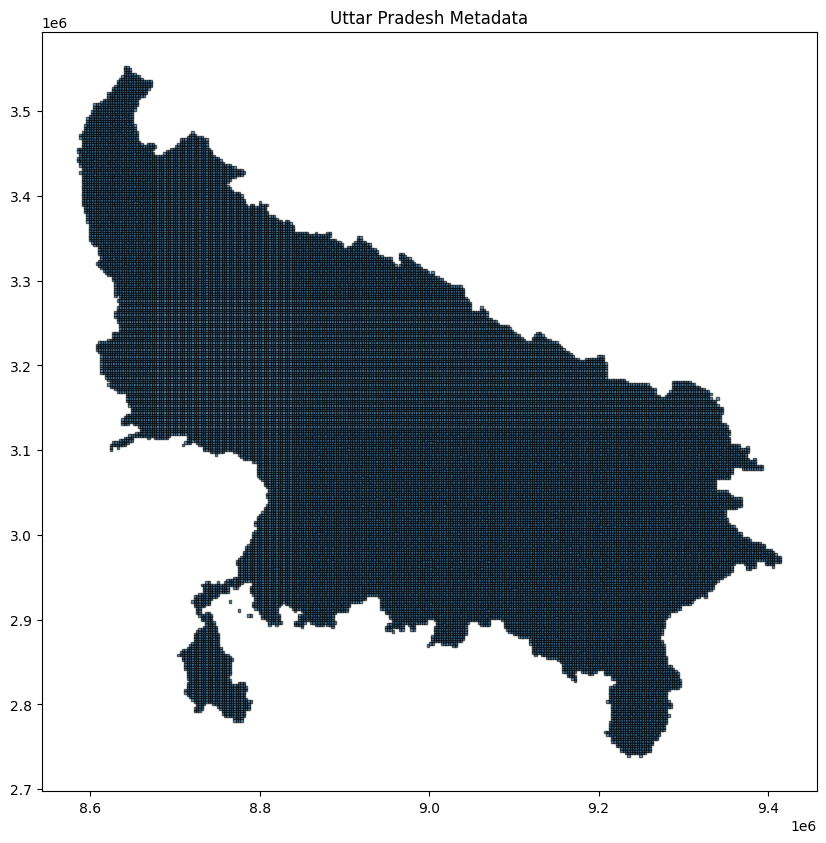

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON
gdf = gpd.read_file("/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/india/uttar_pradesh/metadata.geojson")

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column=None, edgecolor='black', alpha=0.6)
ax.set_title("Uttar Pradesh Metadata")
plt.show()


In [2]:
gdf

x_idx   y_idx        x        y  \
0      40064  162176  8762131  2786585   
1      39488  162176  8759380  2786585   
2      39488  161600  8759380  2789337   
3      40064  161600  8762131  2789337   
4      38912  161600  8756628  2789337   
...      ...     ...      ...      ...   
38818  89024   52736  8996029  3309415   
38819  88448   52736  8993277  3309415   
38820  89600   52736  8998780  3309415   
38821  89024   52160  8996029  3312166   
38822  88448   52160  8993277  3312166   

                                                geometry  
0      POLYGON ((8760603.073 2788114.655, 8763660.554...  
1      POLYGON ((8757851.34 2788114.655, 8760908.821 ...  
2      POLYGON ((8757851.34 2790866.388, 8760908.821 ...  
3      POLYGON ((8760603.073 2790866.388, 8763660.554...  
4      POLYGON ((8755099.607 2790866.388, 8758157.088...  
...                                                  ...  
38818  POLYGON ((8994500.38 3310943.928, 8997557.861 ...  
38819  POLYGON ((8991748.647 3310943.928, 8994806.128...  
38820  POLYGON ((8997252.113 3310943.928, 9000309.594...  
38821  POLYGON ((8994500.38 3313695.661, 8997557.861 ...  
38822  POLYGON ((8991748.647 3313695.661, 8994806.128...  

[38823 rows x 5 columns]

In [3]:
import os

labels_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/india/uttar_pradesh/labels_v4"
file_list = sorted(os.listdir(labels_dir))
print(file_list)
print(len(file_list))


['8586020_3452505.txt', '8588772_3435994.txt', '8591524_3389215.txt', '8591524_3394718.txt', '8591524_3397470.txt', '8591524_3400222.txt', '8591524_3402974.txt', '8591524_3408477.txt', '8591524_3411229.txt', '8591524_3416732.txt', '8591524_3419484.txt', '8591524_3458008.txt', '8591524_3466263.txt', '8591524_3469015.txt', '8594276_3380960.txt', '8594276_3383711.txt', '8594276_3386463.txt', '8594276_3389215.txt', '8594276_3391967.txt', '8594276_3394718.txt', '8594276_3397470.txt', '8594276_3400222.txt', '8594276_3402974.txt', '8594276_3405725.txt', '8594276_3408477.txt', '8594276_3413981.txt', '8594276_3422236.txt', '8594276_3427739.txt', '8594276_3433243.txt', '8594276_3435994.txt', '8594276_3438746.txt', '8594276_3458008.txt', '8597027_3369953.txt', '8597027_3372705.txt', '8597027_3375456.txt', '8597027_3378208.txt', '8597027_3380960.txt', '8597027_3383711.txt', '8597027_3386463.txt', '8597027_3389215.txt', '8597027_3391967.txt', '8597027_3405725.txt', '8597027_3408477.txt', '8597027_3

In [4]:


# Example: replace this with your actual list
txt_files = file_list
# Extract (x, y) from .txt filenames
used_coords = set((int(f.split('_')[0]), int(f.split('_')[1].split('.')[0])) for f in txt_files)

# Exclude rows from gdf where (x, y) matches any in used_coords
filtered_gdf = gdf[~gdf.apply(lambda r: (r['x'], r['y']) in used_coords, axis=1)]

# To reset index
filtered_gdf = filtered_gdf.reset_index(drop=True)
print(f"Number of negative samples: {len(filtered_gdf)}")

Number of negative samples: 27936


In [5]:
print(f"Number of negative samples: {len(filtered_gdf)}")

Number of negative samples: 27936


In [6]:
# file_list = list of your .txt filenames
# gdf = your metadata GeoDataFrame

used_coords = set((int(f.split('_')[0]), int(f.split('_')[1].split('.')[0])) for f in file_list)
positive_gdf = gdf[gdf.apply(lambda r: (r['x'], r['y']) in used_coords, axis=1)].reset_index(drop=True)
print(f"Number of positive samples: {len(positive_gdf)}")


Number of positive samples: 10887


In [7]:
positive_gdf.tail()

x_idx  y_idx        x        y  \
10882  92480  56192  9012539  3292904   
10883  91904  56192  9009787  3292904   
10884  92480  55616  9012539  3295656   
10885  91904  55616  9009787  3295656   
10886  91904  55040  9009787  3298408   

                                                geometry  
10882  POLYGON ((9011010.778 3294433.53, 9014068.259 ...  
10883  POLYGON ((9008259.045 3294433.53, 9011316.526 ...  
10884  POLYGON ((9011010.778 3297185.263, 9014068.259...  
10885  POLYGON ((9008259.045 3297185.263, 9011316.526...  
10886  POLYGON ((9008259.045 3299936.996, 9011316.526...

In [8]:
filtered_gdf.tail()
import os


In [9]:
filtered_gdf.tail()

x_idx  y_idx        x        y  \
27931  89024  52736  8996029  3309415   
27932  88448  52736  8993277  3309415   
27933  89600  52736  8998780  3309415   
27934  89024  52160  8996029  3312166   
27935  88448  52160  8993277  3312166   

                                                geometry  
27931  POLYGON ((8994500.38 3310943.928, 8997557.861 ...  
27932  POLYGON ((8991748.647 3310943.928, 8994806.128...  
27933  POLYGON ((8997252.113 3310943.928, 9000309.594...  
27934  POLYGON ((8994500.38 3313695.661, 8997557.861 ...  
27935  POLYGON ((8991748.647 3313695.661, 8994806.128...

In [10]:
import os

images_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/uttar_pradesh/rgb"
file_list = sorted(os.listdir(images_dir))
print(len(file_list))
print(file_list[:5])  # Print first 5 files for verification

331956
['23.8757_82.8397.png', '23.8757_82.8485.png', '23.8757_82.8573.png', '23.8757_82.8661.png', '23.8757_82.8749.png']


In [11]:
import pandas as pd
from shapely.geometry import Polygon

# Input
image_files = file_list  # List of image filenames
img_size = 128  # pixels

# Sentinel-2 resolution: 10 m per pixel for RGB/NIR bands
pixel_res = 10  # meters
side_m = img_size * pixel_res  # 1280 meters

# Function to build square polygon for each image, assuming perfect alignment
def build_polygon(lat, lon, side_m):
    # Approximate degrees to meters (valid for small extents, low-latitude)
    lat_m = 111320  # meters per degree latitude
    lon_m = 40075000 * np.cos(np.deg2rad(lat)) / 360  # meters per degree longitude
    dlat = (side_m / lat_m) / 2
    dlon = (side_m / lon_m) / 2
    # Build corners (counter-clockwise)
    return Polygon([
        (lon - dlon, lat - dlat),
        (lon - dlon, lat + dlat),
        (lon + dlon, lat + dlat),
        (lon + dlon, lat - dlat),
        (lon - dlon, lat - dlat)
    ])

import numpy as np

records = []
for fn in image_files:
    lat, lon = map(float, fn.replace('.png', '').split('_'))
    poly = build_polygon(lat, lon, side_m)
    area_m2 = poly.area * (111320 * 40075000 / 360)  # crude approx, not used below
    records.append({
        'filename': fn,
        'center_lat': lat,
        'center_lon': lon,
        'polygon': poly,
        'area_m2': poly.area  # area in degree^2
    })

df = pd.DataFrame(records)
df['area_m2'] = (img_size * pixel_res) ** 2  # 1280*1280 = 1,638,400 m²

# Columns: filename, center_lat, center_lon, polygon, area_m2


In [12]:
df

filename  center_lat  center_lon  \
0       23.8757_82.8397.png     23.8757     82.8397   
1       23.8757_82.8485.png     23.8757     82.8485   
2       23.8757_82.8573.png     23.8757     82.8573   
3       23.8757_82.8661.png     23.8757     82.8661   
4       23.8757_82.8749.png     23.8757     82.8749   
...                     ...         ...         ...   
331951  30.4143_77.6985.png     30.4143     77.6985   
331952  30.4143_77.7073.png     30.4143     77.7073   
331953  30.4143_77.7161.png     30.4143     77.7161   
331954  30.4143_77.7249.png     30.4143     77.7249   
331955  30.4143_77.7283.png     30.4143     77.7283   

                                                  polygon  area_m2  
0       POLYGON ((82.83341275302692 23.869950808480056...  1638400  
1       POLYGON ((82.84221275302693 23.869950808480056...  1638400  
2       POLYGON ((82.85101275302692 23.869950808480056...  1638400  
3       POLYGON ((82.85981275302693 23.869950808480056...  1638400  
4       POLYGON ((82.86861275302692 23.869950808480056...  1638400  
...                                                   ...      ...  
331951  POLYGON ((77.69183336667928 30.408550808480058...  1638400  
331952  POLYGON ((77.70063336667928 30.408550808480058...  1638400  
331953  POLYGON ((77.70943336667928 30.408550808480058...  1638400  
331954  POLYGON ((77.71823336667929 30.408550808480058...  1638400  
331955  POLYGON ((77.72163336667928 30.408550808480058...  1638400  

[331956 rows x 5 columns]

In [ ]:
positive_gdf.head()

x_idx   y_idx        x        y  \
0  42368  128768  8773138  2946186   
1  42944  128768  8775890  2946186   
2  44672  125312  8784145  2962696   
3  50432  122432  8811663  2976455   
4  48128  123008  8800656  2973703   

                                            geometry  
0  POLYGON ((8771610.005 2947715.17, 8774667.486 ...  
1  POLYGON ((8774361.738 2947715.17, 8777419.219 ...  
2  POLYGON ((8782616.937 2964225.568, 8785674.419...  
3  POLYGON ((8810134.268 2977984.233, 8813191.749...  
4  POLYGON ((8799127.336 2975232.5, 8802184.817 2...

In [ ]:
df.head()

filename  center_lat  center_lon  \
0  23.8757_82.8397.png     23.8757     82.8397   
1  23.8757_82.8485.png     23.8757     82.8485   
2  23.8757_82.8573.png     23.8757     82.8573   
3  23.8757_82.8661.png     23.8757     82.8661   
4  23.8757_82.8749.png     23.8757     82.8749   

                                             polygon  area_m2  
0  POLYGON ((82.83341275302692 23.869950808480056...  1638400  
1  POLYGON ((82.84221275302693 23.869950808480056...  1638400  
2  POLYGON ((82.85101275302692 23.869950808480056...  1638400  
3  POLYGON ((82.85981275302693 23.869950808480056...  1638400  
4  POLYGON ((82.86861275302692 23.869950808480056...  1638400

In [24]:
df["polygon"].head()

0    POLYGON ((82.83341275302692 23.869950808480056...
1    POLYGON ((82.84221275302693 23.869950808480056...
2    POLYGON ((82.85101275302692 23.869950808480056...
3    POLYGON ((82.85981275302693 23.869950808480056...
4    POLYGON ((82.86861275302692 23.869950808480056...
Name: polygon, dtype: object

In [25]:
positive_gdf["geometry"].head()

0    POLYGON ((8771610.005 2947715.17, 8774667.486 ...
1    POLYGON ((8774361.738 2947715.17, 8777419.219 ...
2    POLYGON ((8782616.937 2964225.568, 8785674.419...
3    POLYGON ((8810134.268 2977984.233, 8813191.749...
4    POLYGON ((8799127.336 2975232.5, 8802184.817 2...
Name: geometry, dtype: geometry

In [45]:
import geopandas as gpd

# Start from the DataFrames
gdf_s = gpd.GeoDataFrame(df, geometry='polygon')
gdf_p = gpd.GeoDataFrame(filtered_gdf, geometry='geometry')

# Set CRS if not set
gdf_s = gdf_s.set_crs("EPSG:4326")  # Set as needed
gdf_p = gdf_p.to_crs("EPSG:4326")


# # Build spatial index for positive polygons
# sindex = gdf_p.sindex

# # Function to check intersection
# def is_not_in_positive(row):
#     possible_matches_index = list(sindex.intersection(row['polygon'].bounds))
#     possible_matches = gdf_p.iloc[possible_matches_index]
#     return not possible_matches.intersects(row['polygon']).any()

# # Filter
# gdf_s_filtered = gdf_s[gdf_s.apply(is_not_in_positive, axis=1)].reset_index(drop=True)


In [46]:

# Spatial join to find intersections
joined = gpd.sjoin(gdf_s, gdf_p, how="left", predicate='intersects', lsuffix='s', rsuffix='p')

# Find the column name for right index (it may differ, so print columns if error)
right_index_col = [col for col in joined.columns if col.startswith('index_') and col != 'index'][0]

# Keep only rows from gdf_s that do NOT intersect any in gdf_p
filtered_gdf_s = joined[joined[right_index_col].isna()].reset_index(drop=True)


In [47]:
print(len(filtered_gdf_s))

61942


In [48]:
filtered_gdf_s.head()

filename  center_lat  center_lon  \
0  23.8757_82.8397.png     23.8757     82.8397   
1  23.8757_82.8485.png     23.8757     82.8485   
2  23.8757_82.8573.png     23.8757     82.8573   
3  23.8757_82.8661.png     23.8757     82.8661   
4  23.8757_82.8749.png     23.8757     82.8749   

                                             polygon  area_m2  index_p  x_idx  \
0  POLYGON ((82.83341 23.86995, 82.83341 23.88145...  1638400      NaN    NaN   
1  POLYGON ((82.84221 23.86995, 82.84221 23.88145...  1638400      NaN    NaN   
2  POLYGON ((82.85101 23.86995, 82.85101 23.88145...  1638400      NaN    NaN   
3  POLYGON ((82.85981 23.86995, 82.85981 23.88145...  1638400      NaN    NaN   
4  POLYGON ((82.86861 23.86995, 82.86861 23.88145...  1638400      NaN    NaN   

   y_idx   x   y  
0    NaN NaN NaN  
1    NaN NaN NaN  
2    NaN NaN NaN  
3    NaN NaN NaN  
4    NaN NaN NaN

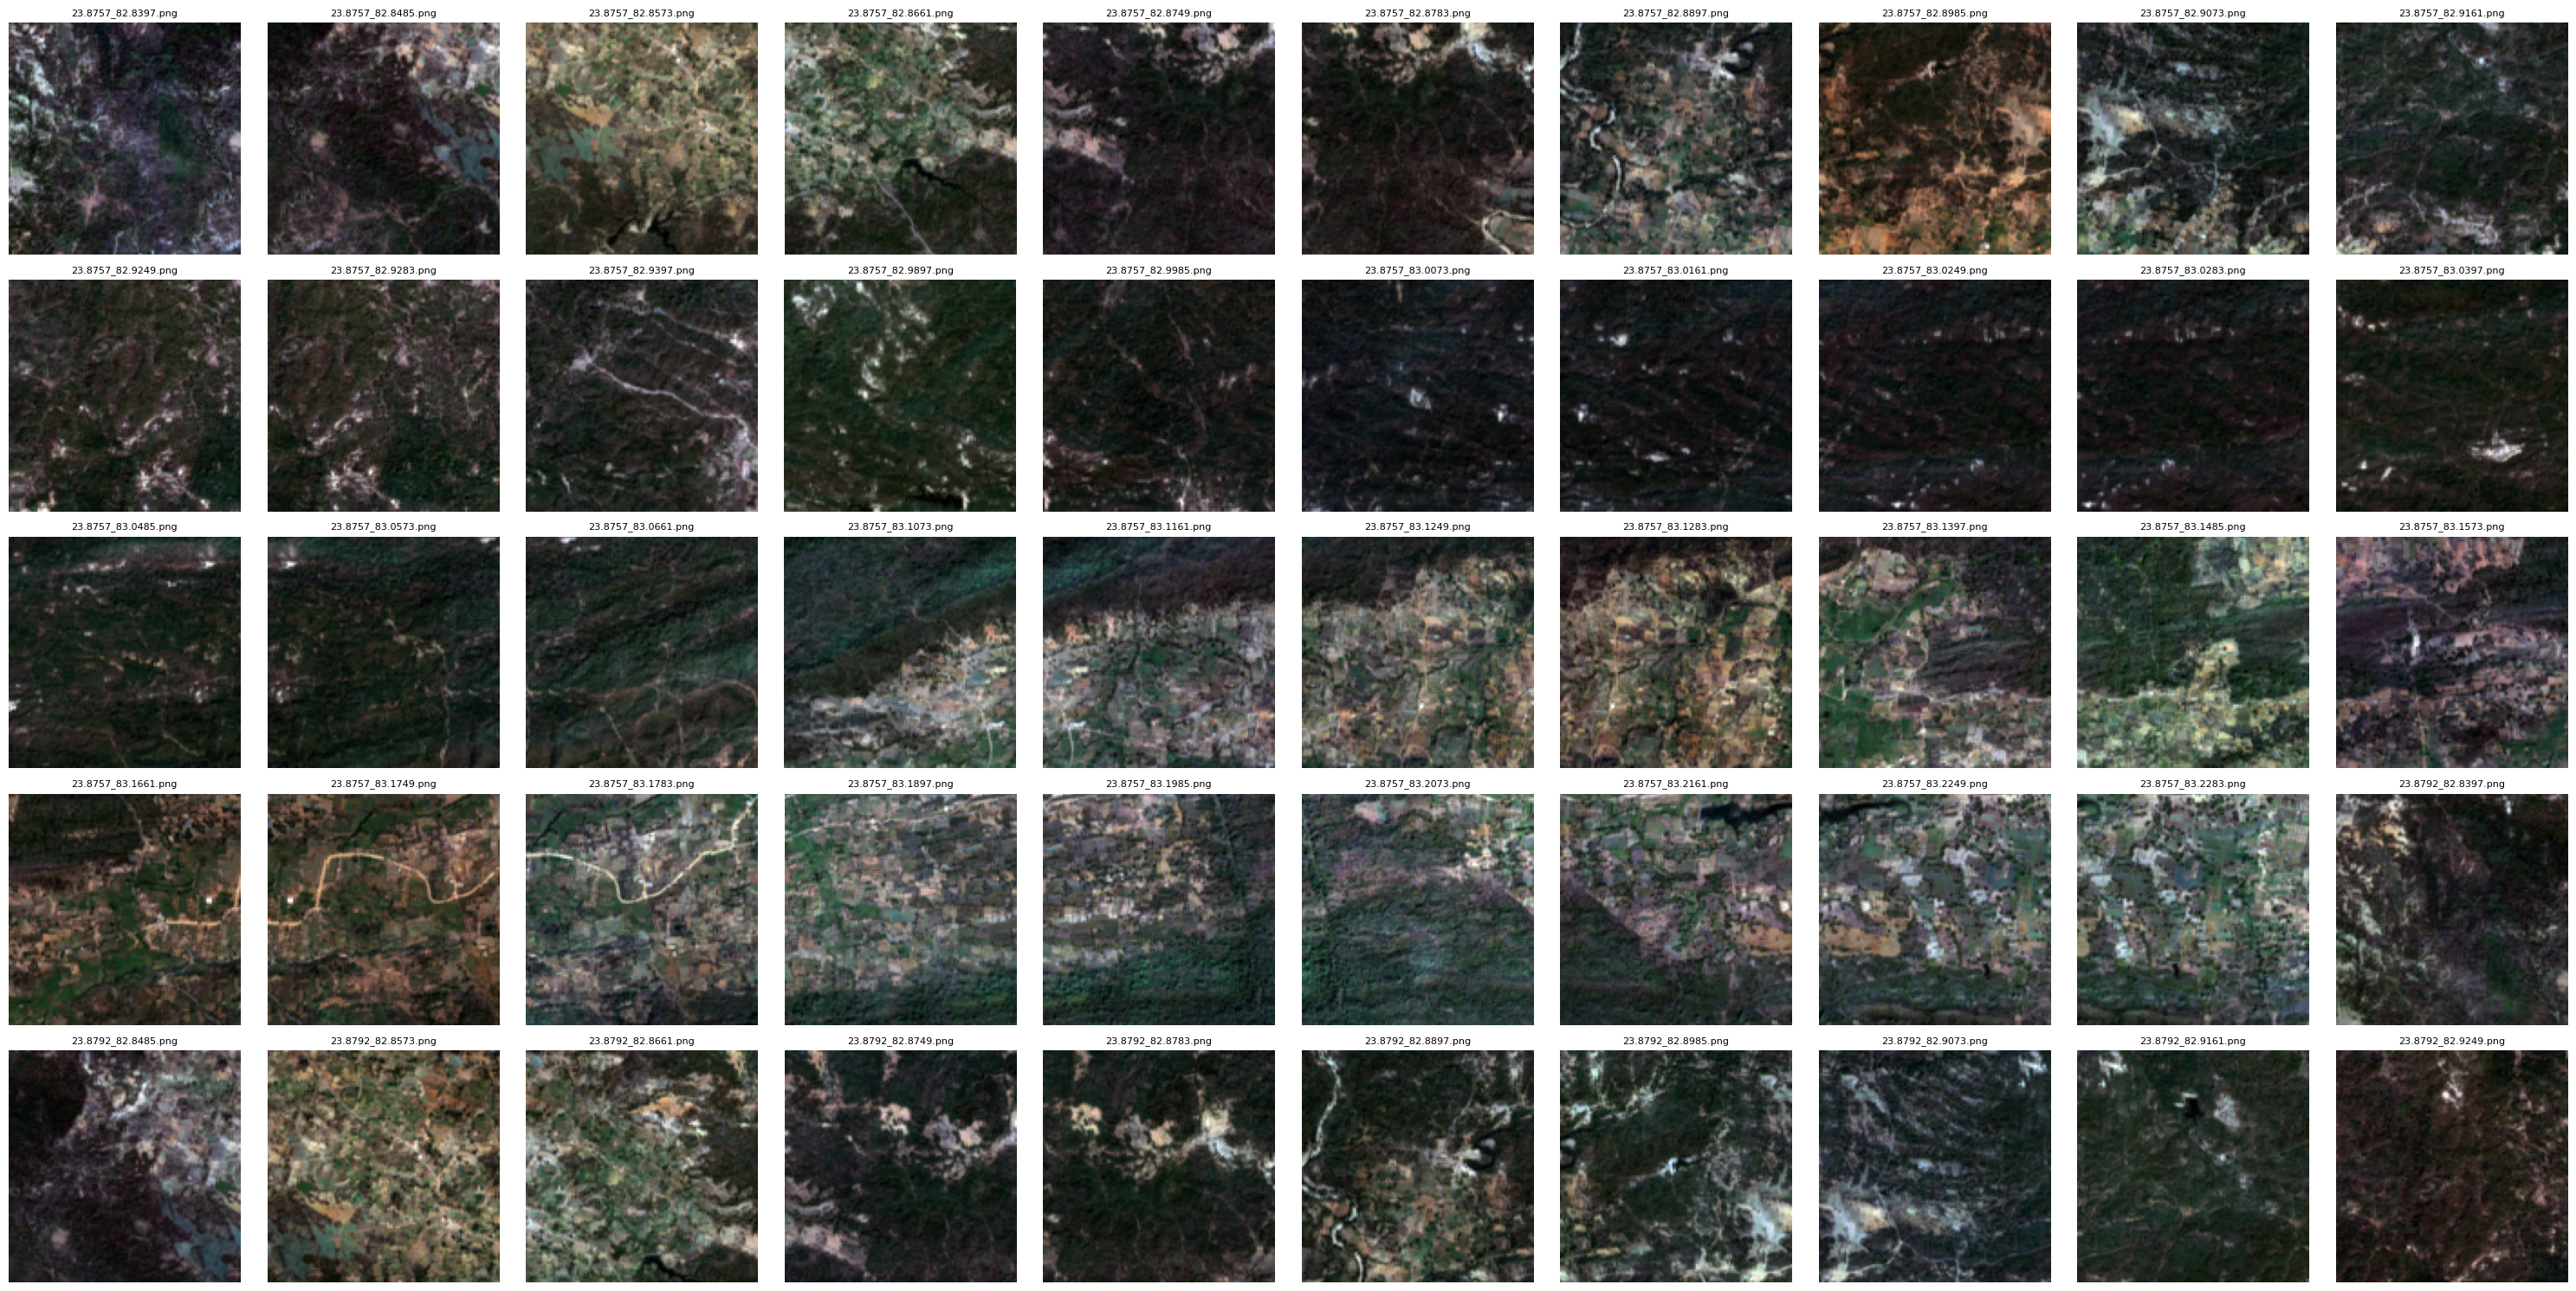

In [49]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import math

def plot_images_from_dir(df, images_dir, n=50):
    rows, cols = 5, 10
    max_images = min(n, len(df))
    display_df = df.head(max_images)
    fig, axs = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))

    axs = axs.flatten()
    for i, (_, row) in enumerate(display_df.iterrows()):
        img_path = os.path.join(images_dir, row['filename'])
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].set_title(row['filename'], fontsize=8)
        else:
            axs[i].set_title(f"{row['filename']} (not found)", fontsize=8)
        axs[i].axis('off')
    # Hide unused subplots
    for j in range(max_images, rows * cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
plot_images_from_dir(filtered_gdf_s, images_dir, n=50)


In [50]:
filtered_gdf_s["filename"]

0        23.8757_82.8397.png
1        23.8757_82.8485.png
2        23.8757_82.8573.png
3        23.8757_82.8661.png
4        23.8757_82.8749.png
                ...         
61937    30.4143_77.6985.png
61938    30.4143_77.7073.png
61939    30.4143_77.7161.png
61940    30.4143_77.7249.png
61941    30.4143_77.7283.png
Name: filename, Length: 61942, dtype: object

In [51]:
import os
labels_dir = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/uttar_pradesh/labels"
label_files = set(os.listdir(labels_dir))
# Remove extensions for matching if needed
label_basenames = set(os.path.splitext(f)[0] for f in label_files)
image_basenames = set(os.path.splitext(f)[0] for f in filtered_gdf_s["filename"])
# Find matches
common_names = image_basenames.intersection(label_basenames)
only_in_images = image_basenames - label_basenames
only_in_labels = label_basenames - image_basenames
print("Matched filenames:", len(common_names))
print("Filenames only in filtered_gdf_s['filename']:", len(only_in_images))
print("Filenames only in labels directory:", len(only_in_labels))

Matched filenames: 13358
Filenames only in filtered_gdf_s['filename']: 48584
Filenames only in labels directory: 11320
